<a href="https://colab.research.google.com/github/Maisho20/PCVK_Sabbaha-Naufal-Erwanda/blob/main/Pertemuan%2012/Week_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Sabbaha Naufal Erwanda**

**Kelas: TI-3A**

**NIM: 2141720221**

# Praktikum 12
Feature Matching, Face Detection, Face Tracking

**Load data**

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library yang digunakan**

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

### 1. Lakukan Face Detection untuk image object lain yang tersedia pada `(/images/facedet)`. Tampilkan seperti pada contoh berikut.

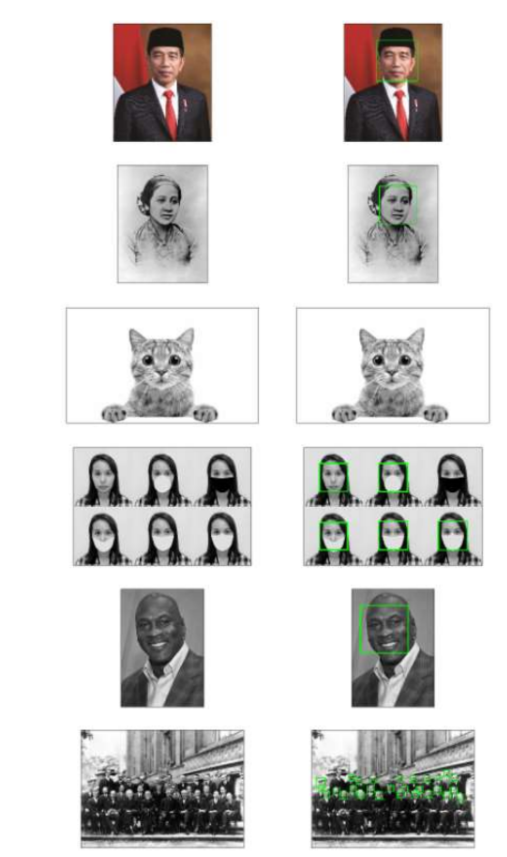

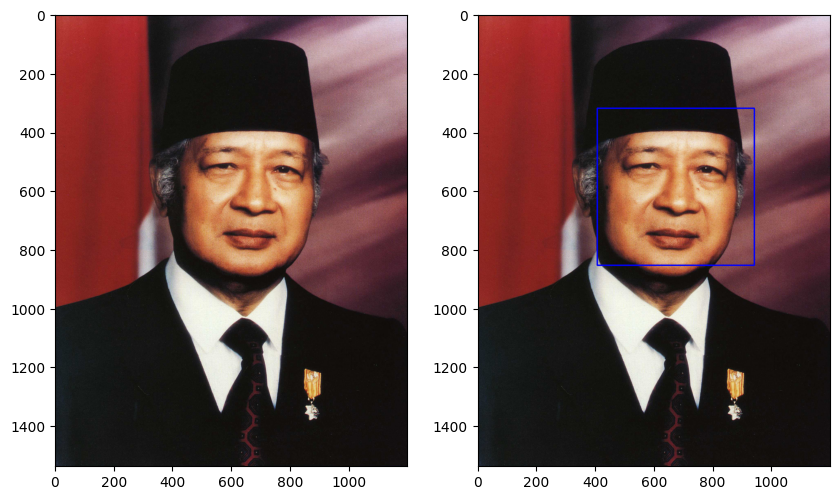

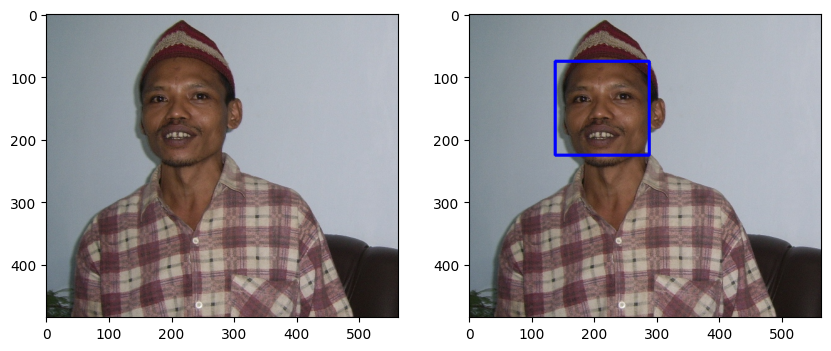

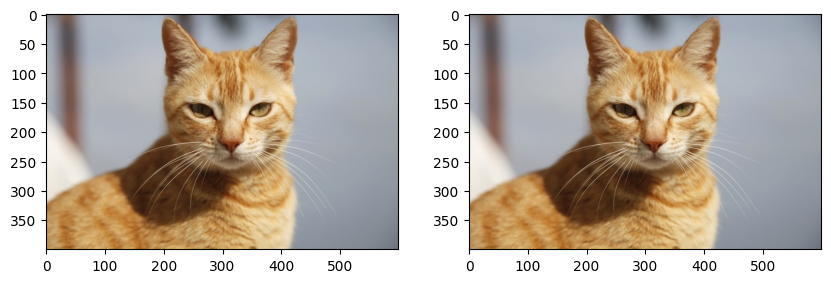

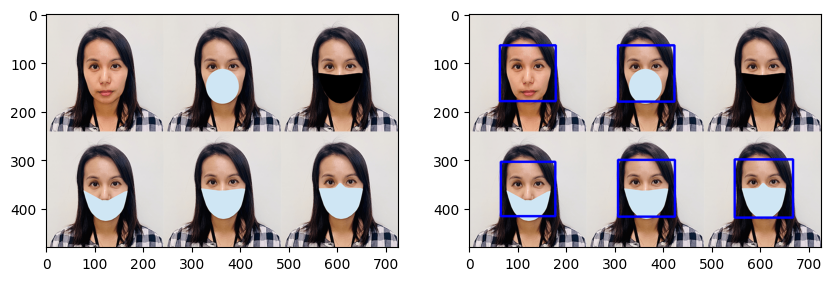

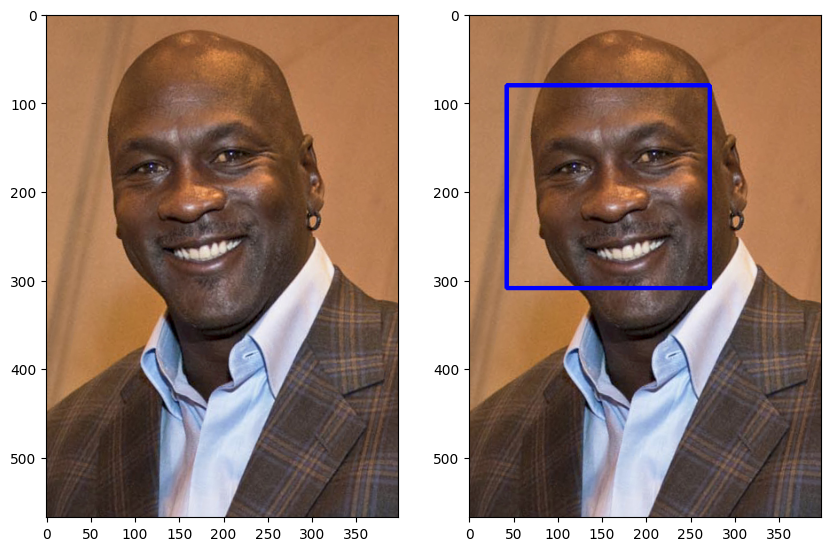

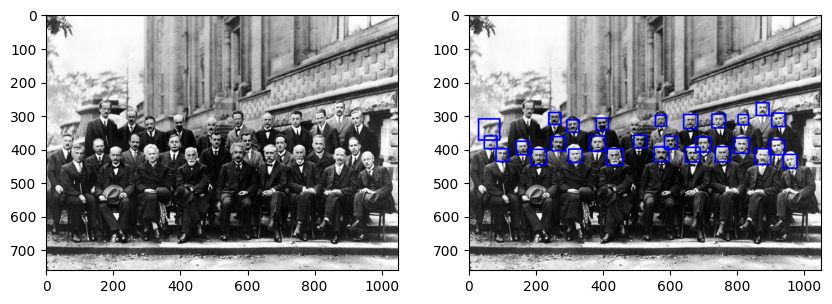

In [ ]:
#Load cascade dari google drive
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/PCVK/Assets/haarcascade_frontalface_alt.xml')

# Melakukan looping untuk memproses data gambar yang dipilih
def face_detection(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = cascade_wajah.detectMultiScale(gray)

    for (x, y, w, h) in faces:
        cv.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)

    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB))
    plt.subplot(122), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()


image_paths = [
    '/content/drive/MyDrive/Colab Notebooks/PCVK/img/President_Suharto,_1993.jpg',
    '/content/drive/MyDrive/Colab Notebooks/PCVK/img/Sumanto2.jpg',
    '/content/drive/MyDrive/Colab Notebooks/PCVK/img/mycat.jpg',
    '/content/drive/MyDrive/Colab Notebooks/PCVK/img/mask.png',
    '/content/drive/MyDrive/Colab Notebooks/PCVK/img/mjordan.jpg',
    '/content/drive/MyDrive/Colab Notebooks/PCVK/img/solvayconf.jpg',
]


for image_path in image_paths:
    face_detection(image_path)

### 2. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya.

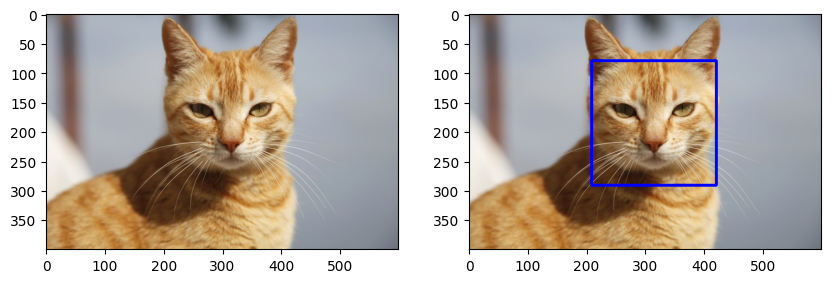

In [ ]:
# Load gambar
cat_image_path = '/content/drive/MyDrive/Colab Notebooks/PCVK/img/mycat.jpg'

# Load file xml
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/PCVK/Assets/haarcascade_frontalcatface_extended.xml')
face_detection(cat_image_path)

### 3. Melakukan eye detection

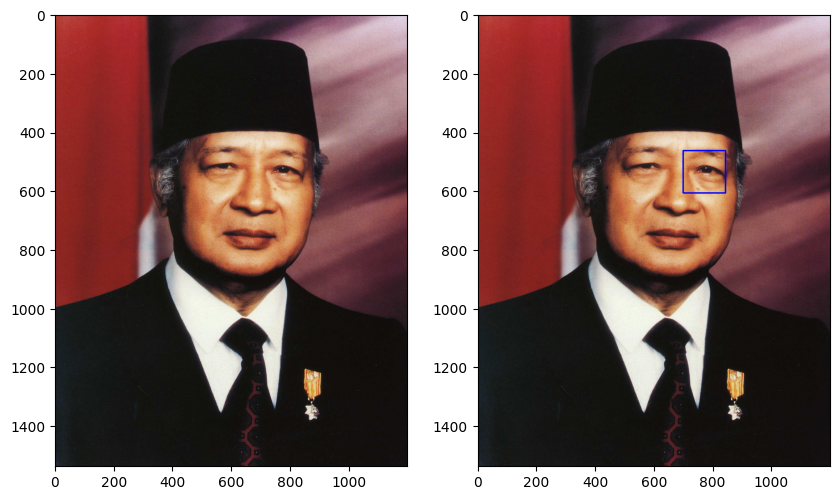

In [ ]:
# Load gambar
soeharto_image_path = '/content/drive/MyDrive/Colab Notebooks/PCVK/img/President_Suharto,_1993.jpg'

# Load file xml
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/PCVK/Assets/haarcascade_eye.xml')
face_detection(soeharto_image_path)

### 4. Melakukan Face Tracking menggunakan Google colab

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

**Webcam image**

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


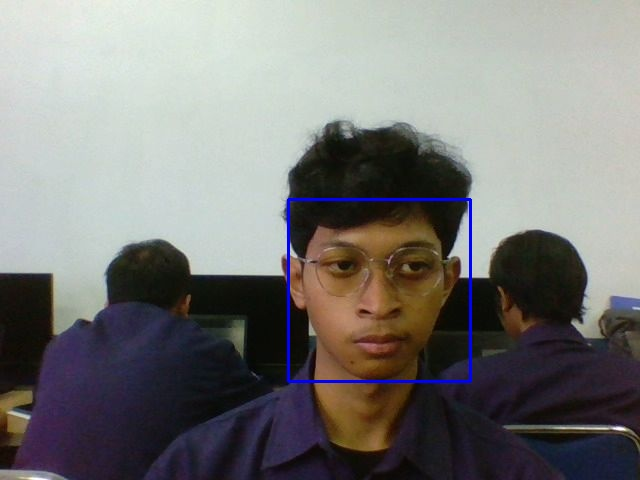

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Webcam video**

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

### 5. Lakukan Blurring pada bagian wajah yang terdeteksi

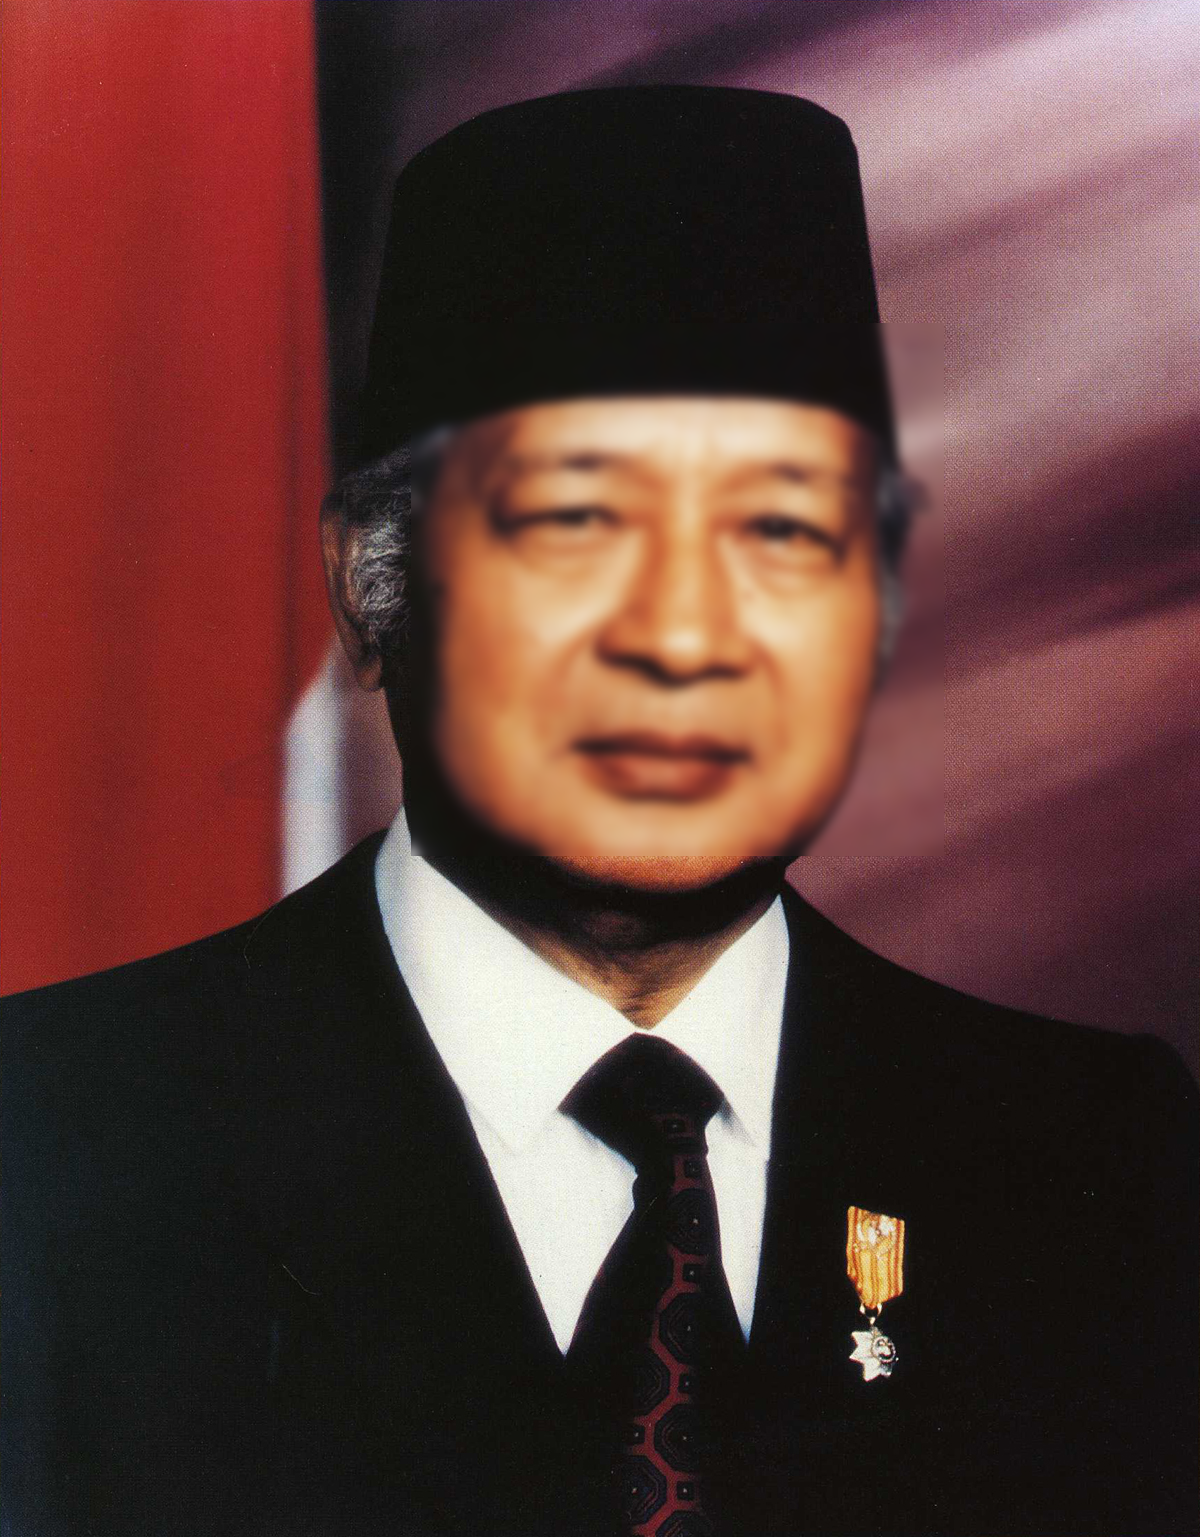

In [ ]:
def blur_faces(image_path):
    # Load pre-trained face detection model
    face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/PCVK/Assets/haarcascade_frontalface_default.xml')

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Blur faces
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv2.GaussianBlur(face, (99, 99), 5)  # Adjust the kernel size for stronger or weaker blurring
        image[y:y+face.shape[0], x:x+face.shape[1]] = face

    # Display the result
    cv2_imshow(image)

image_path = '/content/drive/MyDrive/Colab Notebooks/PCVK/img/President_Suharto,_1993.jpg'
blur_faces(image_path)

### 6. Lakukan segmentasi karakter pada KTP

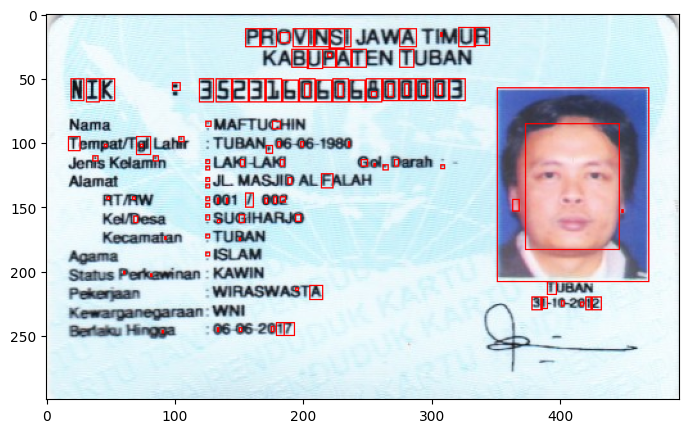

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

### 7. Lakukan cropping pada bagian NIK saja

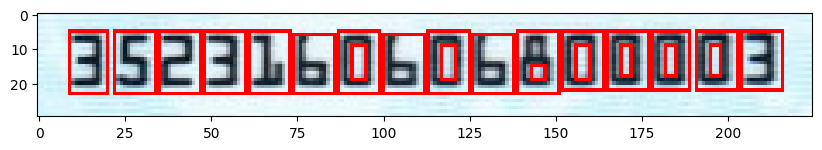

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[45:75, 110:335]

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

### 8. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training di Google Drive
DATADIR = "/content/drive/MyDrive/Colab Notebooks/PCVK/Dataset"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)

    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)

X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


### 9. Melakukan Training Data

In [ ]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)
adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X, Y, epochs=20, verbose=1)
model.save('/content/drive/MyDrive/Colab Notebooks/PCVK/anpr.model')


In [ ]:
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)

### 10. Testing Data

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "/content/drive/MyDrive/Colab Notebooks/PCVK/Dataset/traning"
data_dir_testing = "/content/drive/MyDrive/Colab Notebooks/PCVK/Dataset/testing"
dirs = []
width, height = 100, 100

model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/PCVK/anpr.model")

for char_name in sorted(os.listdir(data_dir_training)):
    dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
    temp = ""
    for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
        img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (width, height))
        new_array = np.array(new_array).reshape(-1, width, height, 1)
        new_array = new_array / 255.0
        prediction = model.predict(new_array)
        temp += dirs[np.argmax(prediction[0])]
    print("folder name: {} no: {}".format(car, temp))

1/1 [==============================] - 0s 21ms/step


IndexError: ignored